AfterWork Data Science: Basics of Deep Learning and Neural Networks
1. Defining the Question
a) Specifying the Data Analysis Question
Identify the factors that could predict whether an employee will get promoted or not.

b) Defining the Metric for Success
This project will be considered a success when:

we are able to confidently determine which employees are likely to get promoted, and
we get at least one model with an accuracy score of around 80%.
c) Understanding the Context
You work for Alphabet Inc. which is a large Multinational Corporation. The company has 9 broad verticals across the organisation. One of the problems the company is facing is around identifying the right people for promotion (only for the manager position and below) and prepare them in time

Currently the HR process, they are following is:

They first identify a set of employees based on recommendations/ past performance.
Selected employees go through the separate training and evaluation program for each vertical.
These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., the employee gets a promotion.

For the above-mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

d) Recording the Experimental Design
Load dataset and libraries.
Clean dataset.
Carry out univariate and bivariate analysis.
Determine which employees are likely to be promoted based on the results of the analysis.
Carry out data modeling.
Summarize findings.
Provide recommendations.
Challenge the solution.
e) Data Relevance
The data provided is sufficient and appropriate for answering the research question.

2. Data Cleaning & Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
hr = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
glossary = pd.read_csv('https://bit.ly/2Wz3sWcGlossary ', header = None)
glossary

,0
0,employee_id - Unique ID for employee
1,department - Department of employee
2,region - Region of employment (unordered)
3,education - Education Level
4,gender - Gender of Employee
5,recruitment_channel - Channel of recruitment for employee
6,"nooftrainings - no of other trainings completed in previous year on soft skills, technical skills etc."
7,age - Age of Employee
8,previousyearrating - Employee Rating for the previous year
9,lengthofservice - Length of service in years


In [4]:
# dropping 'employeeid' variable
hr = hr.drop(columns = ['employee_id'])

In [5]:
# check dataset shape
hr.shape

(54808, 13)

In [6]:
# drop duplicates, if any
hr.drop_duplicates(inplace = True)
hr.shape

(54690, 13)

In [7]:
# check for missing values
hr.isna().sum()

department                 0
region                     0
education               2398
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4062
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# dropping records with null values
hr.dropna(inplace = True, axis = 0)
hr.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
# checking the data types
hr.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [10]:
# getting the unique values of each variable
cols = hr.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", hr[col].nunique())
    print(hr[col].unique())
    print()

Variable: department
Number of unique values: 9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Variable: region
Number of unique values: 34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']

Variable: education
Number of unique values: 3
["Master's & above" "Bachelor's" 'Below Secondary']

Variable: gender
Number of unique values: 2
['f' 'm']

Variable: recruitment_channel
Number of unique values: 3
['sourcing' 'other' 'referred']

Variable: no_of_trainings
Number of unique values: 10
[ 1  2  3  4  7  5  6 10  8  9]

Variable: age
Number of unique values: 41
[35 30 34 39 45 31 33

In [11]:
# striping "region_" from the 'region' variable
hr['region'] = hr['region'].str.strip('region_')
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


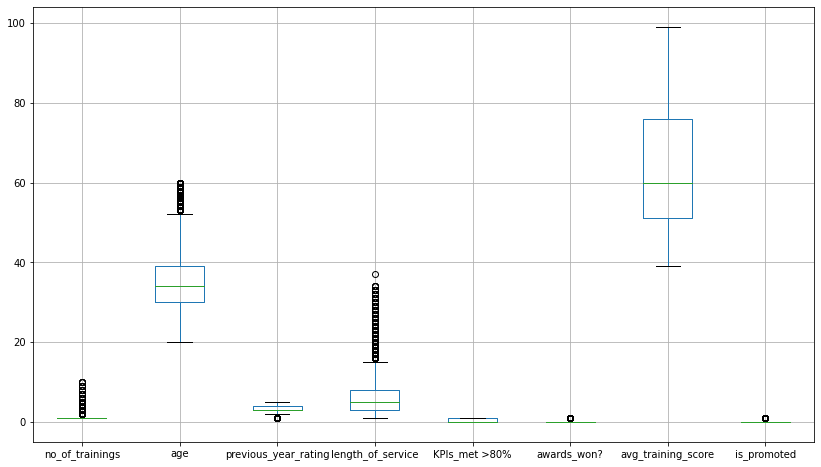

In [12]:
# checking for outliers
plt.figure(figsize = (14, 8))
hr.boxplot()
plt.show()

3. Data Analysis
3.1 Univariate Analysis

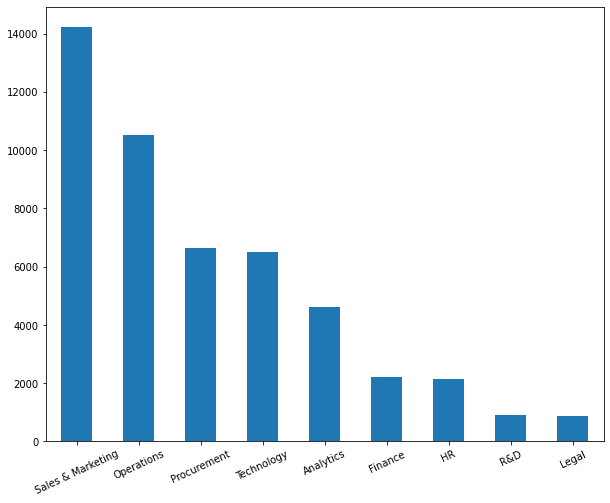

In [13]:
# distribution of department
plt.figure(figsize = (10, 8))
hr.department.value_counts().plot(kind = 'bar', rot = 25)
plt.show()

In [14]:
# getting the top 5 regions
hr.region.value_counts()[:5]

2     10797
22     5427
7      4395
15     2504
13     2459
Name: region, dtype: int64

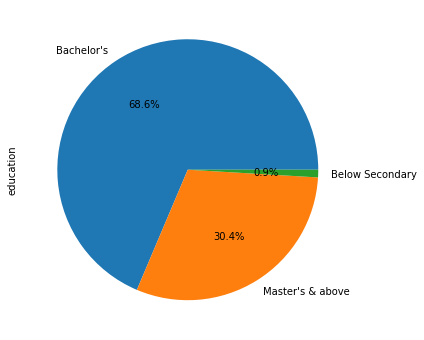

In [15]:
# pie chart of education
plt.figure(figsize = (6, 6))
hr.education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

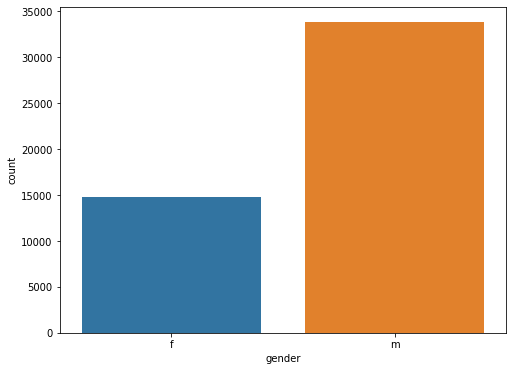

In [16]:
# distribution by gender
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (8, 6))
sns.countplot('gender', data = hr)
plt.show()

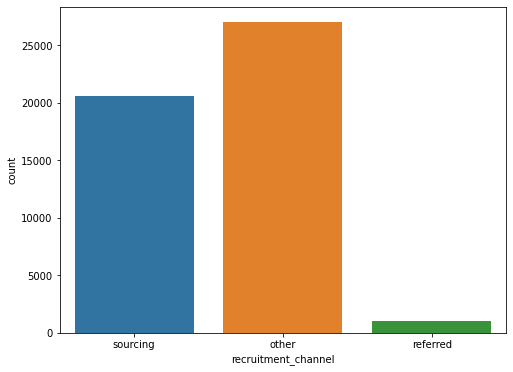

In [17]:
# distribution of recruitment channel
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (8, 6))
sns.countplot('recruitment_channel', data = hr)
plt.show()

In [18]:
hr.no_of_trainings.value_counts()

1     39350
2      7105
3      1578
4       402
5       116
6        34
7        10
10        5
8         4
9         3
Name: no_of_trainings, dtype: int64

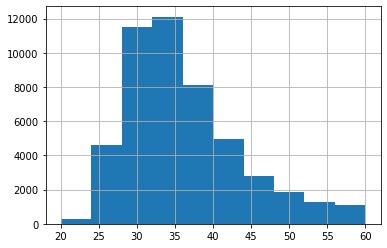

In [19]:
# histogram of age
hr.age.hist()
plt.show()

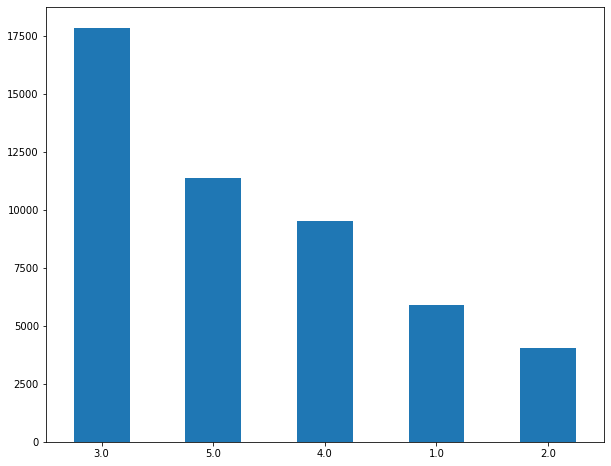

In [20]:
# distribution of previous year's rating
plt.figure(figsize = (10, 8))
hr.previous_year_rating.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

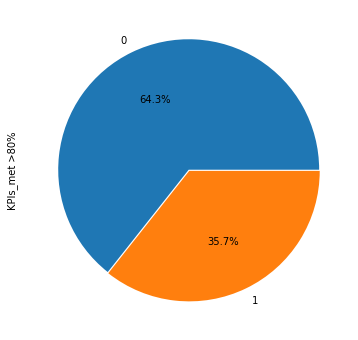

In [24]:
# distribution of KPI
plt.figure(figsize = (6, 6))
hr['KPIs_met >80%'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = (0, 0.01))
plt.show()

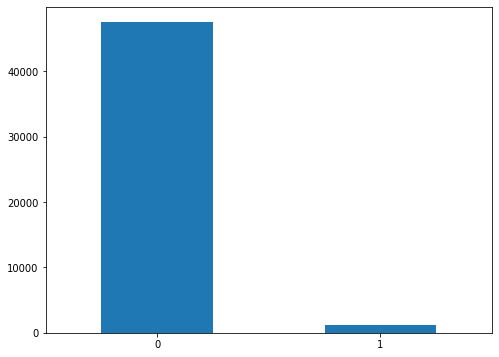

In [25]:
# distribution of awards won
plt.figure(figsize = (8, 6))
hr['awards_won?'].value_counts().plot(kind = 'bar', rot = 0)
plt.show()

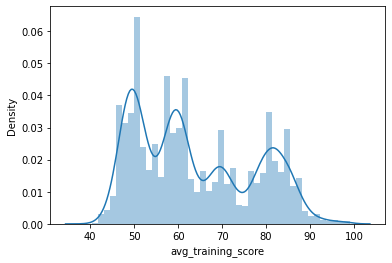

In [26]:
# distribution of average training score
import warnings
warnings.filterwarnings('ignore')
sns.distplot(hr.avg_training_score)
plt.show()

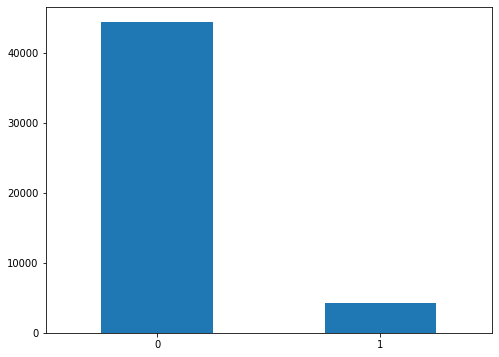

In [27]:
# distribution of promotion status
plt.figure(figsize = (8, 6))
hr.is_promoted.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

Majority of the employees were not promoted.

3.2 Bivariate Analysis
We will look at the relationship between our target variable 'is_promoted' and the other variables.

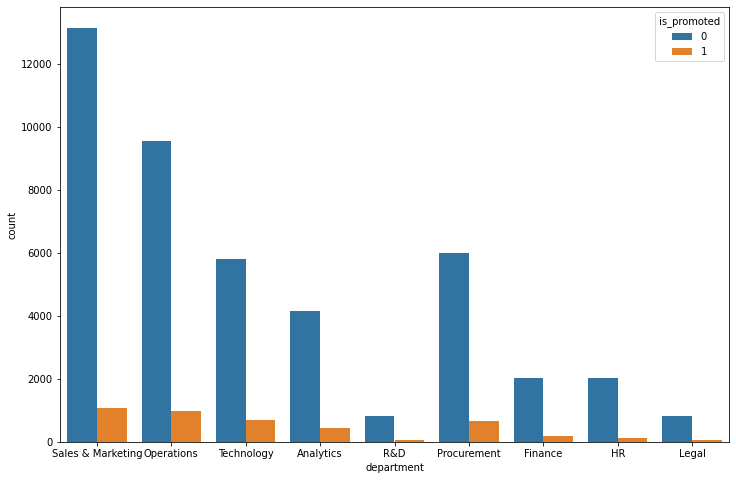

In [28]:
# promotion by department
plt.figure(figsize = (12, 8))
sns.countplot('department', hue = 'is_promoted', data = hr)
plt.show()

From the analysis majority of the emloyees that were promoted are from the Sales & Marketing department and the Operations departent.

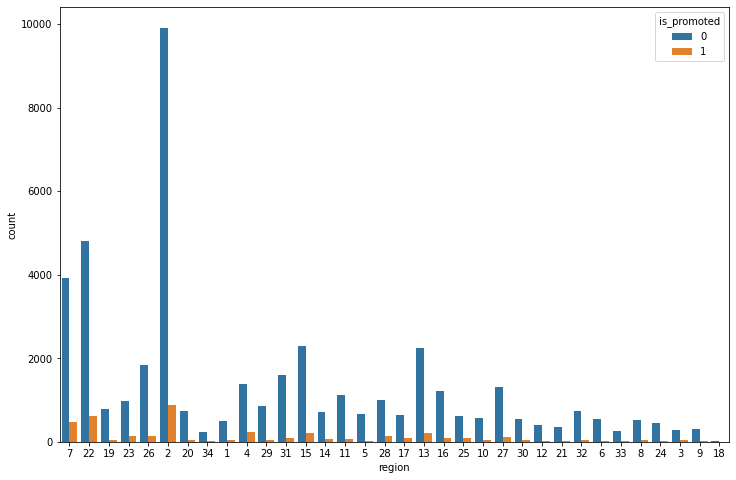

In [29]:
# region by department
plt.figure(figsize = (12, 8))
sns.countplot('region', hue = 'is_promoted', data = hr)
plt.show()

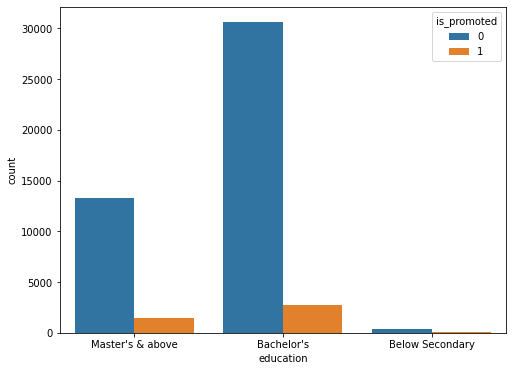

In [30]:
# promotion by education
plt.figure(figsize = (8, 6))
sns.countplot('education', hue = 'is_promoted', data = hr)
plt.show()

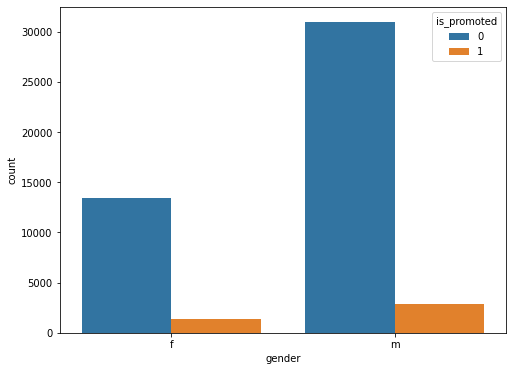

In [31]:
# promotion by gender
plt.figure(figsize = (8, 6))
sns.countplot('gender', hue = 'is_promoted', data = hr)
plt.show()

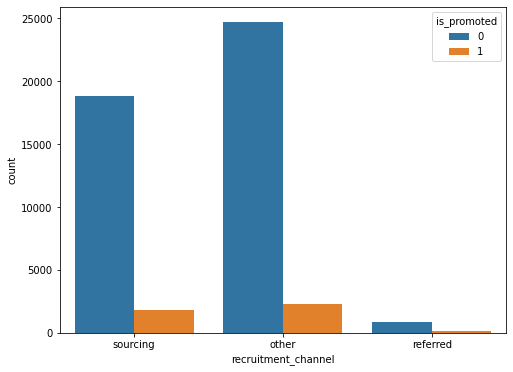

In [32]:
# promotion by recruitment channel
plt.figure(figsize = (8, 6))
sns.countplot('recruitment_channel', hue = 'is_promoted', data = hr)
plt.show()

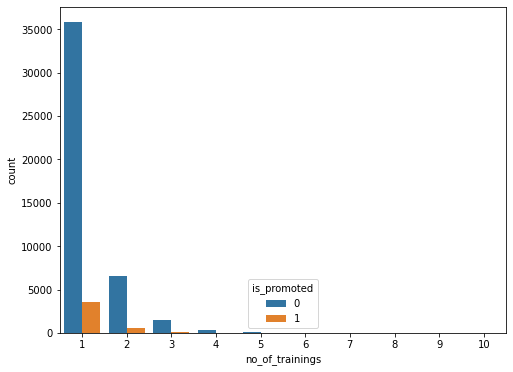

In [33]:
# promotion by number of trainings
plt.figure(figsize = (8, 6))
sns.countplot('no_of_trainings', hue = 'is_promoted', data = hr)
plt.show()

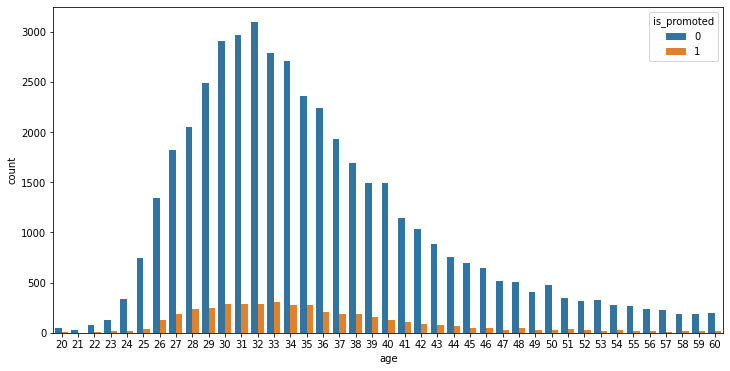

In [34]:
# promotion by age
plt.figure(figsize = (12, 6))
sns.countplot('age', hue = 'is_promoted', data = hr)
plt.show()

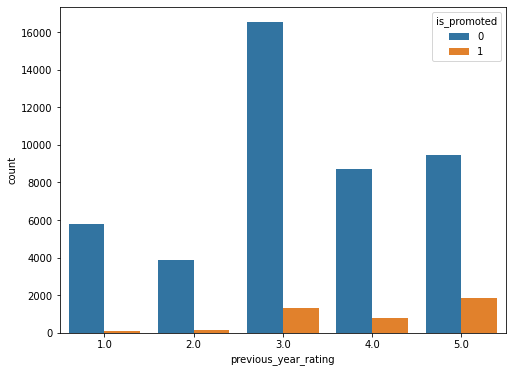

In [35]:
# promotion by previous year's rating
plt.figure(figsize = (8, 6))
sns.countplot('previous_year_rating', hue = 'is_promoted', data = hr)
plt.show()

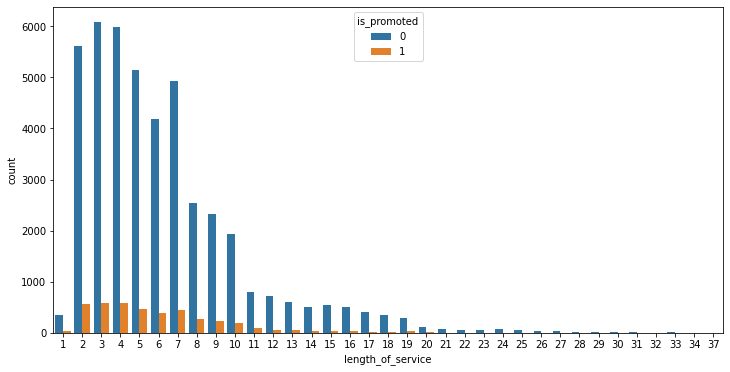

In [36]:
# promotion by length of service
plt.figure(figsize = (12, 6))
sns.countplot('length_of_service', hue = 'is_promoted', data = hr)
plt.show()

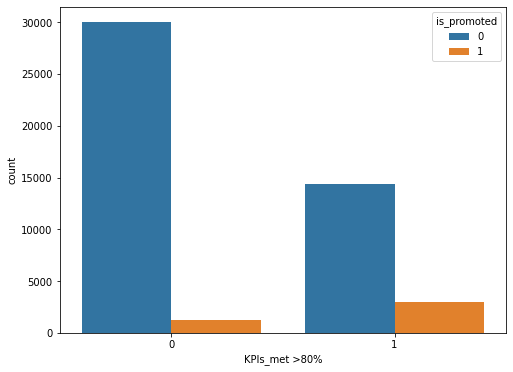

In [37]:
# promotion by KPIs met
plt.figure(figsize = (8, 6))
sns.countplot('KPIs_met >80%', hue = 'is_promoted', data = hr)
plt.show()

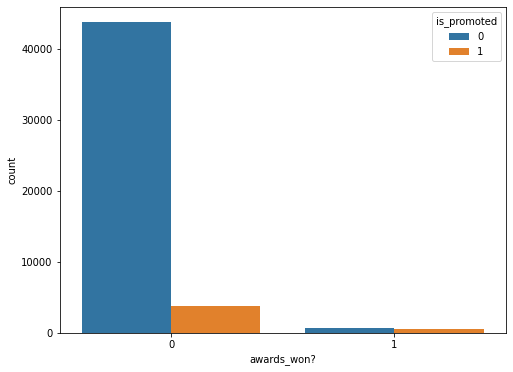

In [38]:
# promotion by awards won
plt.figure(figsize = (8, 6))
sns.countplot('awards_won?', hue = 'is_promoted', data = hr)
plt.show()

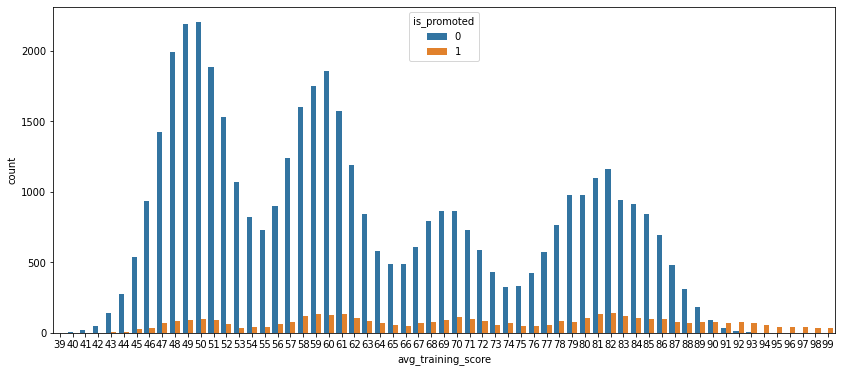

In [39]:
# promotion by average training score
plt.figure(figsize = (14, 6))
sns.countplot('avg_training_score', hue = 'is_promoted', data = hr)
plt.show()

3.2.1 Feature Engineering
To explore the correlations between variables, let us first convert the categorical variables into numerical data. We already stripped 'region' of its non-numeric characters so all that's left to do with it is to cast it as an integer.

In [40]:
hr['region'] = hr['region'].astype('int64')
hr.region.dtype

dtype('int64')

Next, the following variables need to be encoded (converted from categorical to numerical form):

department
education
gender
recruitment channel
To quickly encode them, we will use LabelEncoder.

In [41]:
# importing Label Encoder from the Sklear preprocessing library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fitting the LabelEncoder to the unique values of the 'department' variable
le_department = le.fit(hr['department'].unique())

# getting the classes of the unique values
department_classes = le_department.classes_

# transforming the variable values
hr['department'] = le_department.transform(hr['department'].values)

# previewing our dataset to see our transformed values
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,4,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,7,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,8,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [42]:
# to get the decoded values
print(department_classes[7])
print(department_classes[4])

Sales & Marketing
Operations


In [43]:
# doing the same thing for 'education'
le_education = le.fit(hr['education'].unique())
education_classes = le_education.classes_
hr['education'] = le_education.transform(hr['education'].values)

# preview the decoded values
print(education_classes[2])
print(education_classes[0])

Master's & above
Bachelor's


In [44]:
# doing the same thing for 'gender'
le_gender = le.fit(hr['gender'].unique())
gender_classes = le_gender.classes_
hr['gender'] = le_gender.transform(hr['gender'].values)

# preview the decoded values
print(gender_classes[0])
print(gender_classes[1])

f
m


In [46]:
# doing the same thing for 'recruitment_channel'
le_recruitment = le.fit(hr['recruitment_channel'].unique())
recruitment_classes = le_recruitment.classes_
hr['recruitment_channel'] = le_recruitment.transform(hr['recruitment_channel'].values)

# preview the decoded values
print(recruitment_classes[0])
print(recruitment_classes[2])

0
2


In [47]:
# previewing our transformed dataset
hr.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,7,2,0,2,1,35,5.0,8,1,0,49,0
1,4,22,0,1,0,1,30,5.0,4,0,0,60,0
2,7,19,0,1,2,1,34,3.0,7,0,0,50,0
3,7,23,0,1,0,2,39,1.0,10,0,0,50,0
4,8,26,0,1,0,1,45,3.0,2,0,0,73,0


In [48]:
# confirming all our datatypes are numerical
hr.dtypes

department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

3.2.2 Testing for Multicollinearity

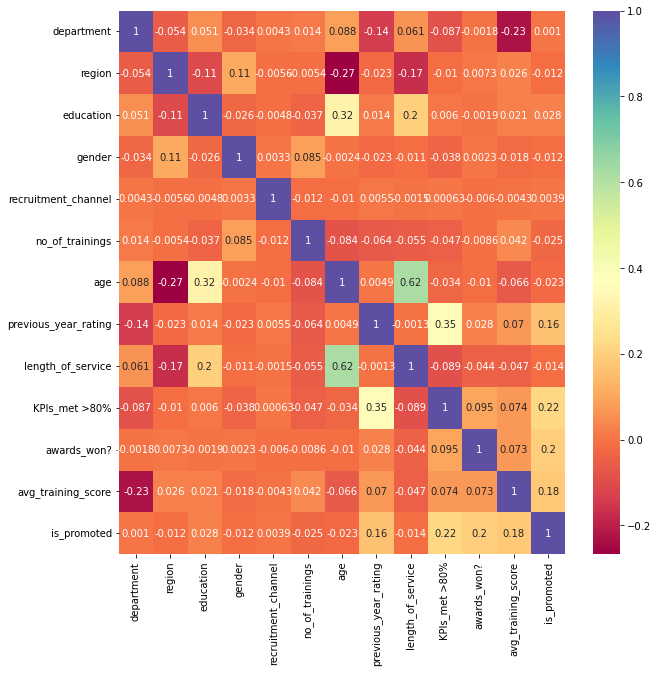

In [50]:
# creating a correlation matrix to visualize correlations
corr = hr.corr()

# visualizing using a heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'Spectral')
plt.show()

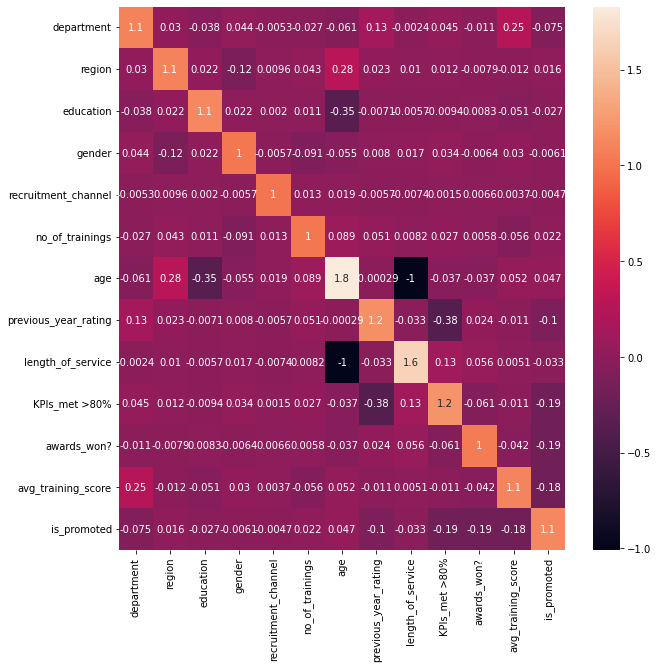

In [51]:
# heatmap of VIF
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

plt.figure(figsize = (10, 10))
sns.heatmap(vif, annot = True)
plt.show()

According to our VIF heatmap, we don't have any values approaching or exceeding 5, which would be indicative of high multicollinearity.

Data Modeling
We come to the following conclusions about our data:

- it does not have high multicollinearity
- it has many outliers
- it does not have a normal/Gaussian distribution
Thus, knowing this, we know that logistic regression would be a terrible algorithm for our model. We will still use it for comparison purposes.



In [52]:
# dividing our dataset into features (X) and target (y)
X = np.array(hr.drop(columns = ['is_promoted']))
y = hr['is_promoted']

print(X.shape)
print(y.shape)

(48607, 12)
(48607,)


In [53]:
# splitting into 80-20 train-test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# loading our classification libraries

from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# instantiating our classifiers

logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB()

# fitting our classifiers to the training data

logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)


# making predictions

logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)

In [56]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(classification_report(y_test, logistic_y_prediction))


# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(classification_report(y_test, naive_y_prediction))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(classification_report(y_test, decision_y_prediction))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(classification_report(y_test, knn_y_prediction))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(classification_report(y_test, svm_y_prediction))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8865
           1       0.64      0.07      0.12       857

    accuracy                           0.91      9722
   macro avg       0.78      0.53      0.54      9722
weighted avg       0.89      0.91      0.88      9722

Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8865
           1       0.51      0.14      0.22       857

    accuracy                           0.91      9722
   macro avg       0.71      0.56      0.58      9722
weighted avg       0.89      0.91      0.89      9722

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8865
           1       0.41      0.45      0.43       857

    accuracy                           0.89      9722
   m

In [59]:
# We import Artificial Neural Network libraries
import keras
from keras.models import Sequential     # Used to initialize the Artificial Neural Network
from keras.layers import Dense          # Used to build the hidden Layers
from keras.layers import Dropout        # Used to prevent overfitting



# Defining our ANN
classifier = Sequential()

classifier.add(Dense(units = 100, input_dim = 12, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.3, seed = 2))

classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
classifier.fit(X_train, y_train, epochs = 300, batch_size = 32)

# Evaluating our model
loss, accuracy = classifier.evaluate(X_test, y_test)
print('ANN Accuracy:', accuracy)

2022-08-03 11:44:14.915621: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
1216/1216 [==============================] - 10s 6ms/step - loss: 0.2515 - accuracy: 0.9164
Epoch 2/300
1216/1216 [==============================] - 6s 5ms/step - loss: 0.2342 - accuracy: 0.9189
Epoch 3/300
1216/1216 [==============================] - 7s 5ms/step - loss: 0.2279 - accuracy: 0.9217
Epoch 4/300
1216/1216 [==============================] - 6s 5ms/step - loss: 0.2245 - accuracy: 0.9233
Epoch 5/300
1216/1216 [==============================] - 6s 5ms/step - loss: 0.2212 - accuracy: 0.9239
Epoch 6/300
1216/1216 [==============================] - 4s 3ms/step - loss: 0.2182 - accuracy: 0.9244
Epoch 7/300
1216/1216 [==============================] - 4s 4ms/step - loss: 0.2145 - accuracy: 0.9249
Epoch 8/300
1216/1216 [==============================] - 4s 3ms/step - loss: 0.2114 - accuracy: 0.9251
Epoch 9/300
1216/1216 [==============================] - 4s 4ms/step - loss: 0.2085 - accuracy: 0.9252
Epoch 10/300
1216/1216 [==============================] - 4s 3ms/step - 

5. Summary of Findings
The Dataset was very biased as majority of employees were in the Sales & Marketing department and also there was twice as many male employees as females.

I also noted that several variables had outliers i.e No.of tracking, Age & Length of service, we used the regression model that assumes that there are no outliers in the data, yet we did not remove them.

6. Recommendations
Alphabet Inc. can rely on Artificial Neural Network to correctly identify the right people for promotion and prepare them in time. Based on the results An Acurracy score of 93.7% was acheived with Artificial Neural Networks which is an improvement from the previous models had their highest Accuracy Score for SVM at 92.0% Therefore the Metric of sucess was acheived, the metric set was 80.0 %

7. Challenging your Solution
a) Did we have the right question?
YES

b) Did we have the right data?
No we did not, a balanced dataset needs to be generated where the disparities are reduced

c) What can be done to improve the solution?
Hyper parameter tuning will help find best hyper parameters to help improve the different models performance

Feature engineering and selection- use domain knowledge to select best features.

Givng the model more data- which could translate into new cases or new features